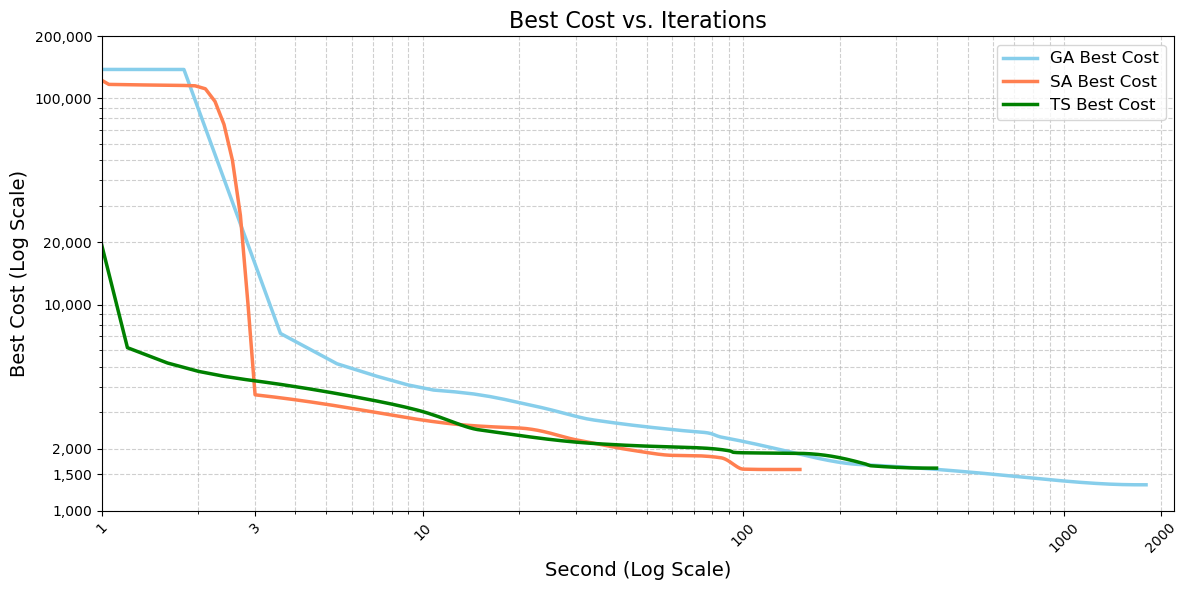

In [34]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import PchipInterpolator
import matplotlib.ticker as ticker


def process_and_plot(iterations, best_cost, color, label, ax, num_points=500):
    """Processes and plots the data with PCHIP and monotonicity."""

    # Sort the data (important for PCHIP)
    sorted_data = sorted(zip(iterations, best_cost))
    iterations, best_cost = zip(*sorted_data)

    # Convert to numpy arrays
    iterations = np.array(iterations)
    best_cost = np.array(best_cost)

    # PCHIP Interpolation
    pchip = PchipInterpolator(iterations, best_cost)
    xnew = np.linspace(iterations[0], iterations[-1], num_points)
    y_smooth = pchip(xnew)

    # Enforce monotonicity
    for i in range(1, len(y_smooth)):
        y_smooth[i] = min(y_smooth[i - 1], y_smooth[i])

    ax.plot(xnew, y_smooth, color=color, linewidth=2.5, label=label)


# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))

# --- Data ---
SecondGA = [0, 1, 2, 3, 4, 5, 6, 7, 8, 11, 13, 22, 34, 62, 78, 85, 230, 1710, 1800]
BestCostGA = [1021914, 229757, 118742, 7839, 6930, 5374, 4945, 4556, 4263, 3836, 3756, 3236, 2757, 2462, 2380, 2278, 1676, 1336, 1336]

SecondSA = [0, 1, 2, 3, 18, 20, 30, 45, 60, 70, 85, 100, 118, 150]
BestCostSA = [1300471, 117134, 114904, 3650, 2535, 2519, 2209, 1965, 1856, 1850, 1807, 1591, 1585, 1585]

SecondTS = [0, 1, 2, 3, 10, 15, 35, 91, 93, 100, 150, 240, 250, 384, 400]
BestCostTS = [1251523, 6950, 4742, 4267, 3026, 2468, 2114, 1949, 1920, 1910, 1898, 1686, 1652, 1609, 1609]

# Plot the data
process_and_plot(SecondGA, BestCostGA, 'skyblue', 'GA Best Cost', ax, num_points=1000)
process_and_plot(SecondSA, BestCostSA, 'coral', 'SA Best Cost', ax, num_points=1000)
process_and_plot(SecondTS, BestCostTS, 'green', 'TS Best Cost', ax, num_points=1000)

# --- X-axis setup ---
max_iteration = max(max(SecondGA), max(SecondSA), max(SecondTS), 2000)
ax.set_xscale('log')

# Explicitly set x-ticks, including 2000
tick_positions_x = [1, 3, 10, 100, 1000, 2000]  # Ensure 2000 is included
ax.set_xticks(tick_positions_x)
ax.set_xlim(1, max_iteration * 1.1)  # Extend slightly beyond max for better spacing

ax.get_xaxis().set_major_formatter(plt.ScalarFormatter())
ax.tick_params(axis='x', rotation=45)


# --- Y-axis setup ---
ax.set_yscale('log')
tick_positions_y = [10**3, 1500, 2000, 10**4, 20000, 10**5, 200000]
ax.set_yticks(tick_positions_y)
ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_ylim(1000, 200000)

# --- Plot styling ---
ax.set_title('Best Cost vs. Iterations', fontsize=16)
ax.set_xlabel('Second (Log Scale)', fontsize=14)
ax.set_ylabel('Best Cost (Log Scale)', fontsize=14)
ax.grid(True, which="both", ls="--", alpha=0.6)
ax.legend(fontsize=12)
plt.tight_layout()

# --- Save and show ---
plt.savefig("best_cost_vs_iterations.svg", format='svg')
plt.show()